## A1.Findthe first derivative of your speech signal with finite differencemethod. Listen to the first derivative signal and the original speech signal.

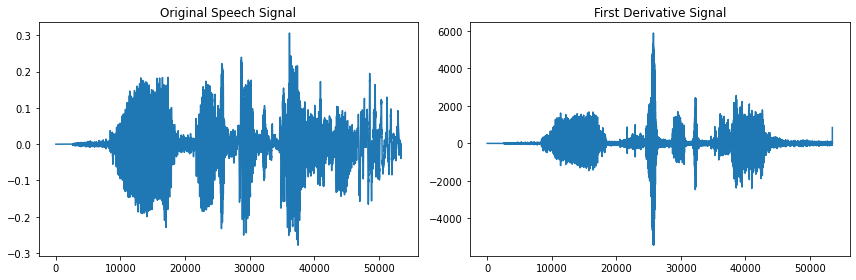

Original Speech Signal:


Derivative Signal:


In [11]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
filename="audio.wav"
def firstderivative1(signal, fs):
    derivative = np.diff(signal) * fs
    return derivative

audio_data1, fs1 = librosa.load(filename)

derivative_signal1 = firstderivative1(audio_data1, fs1)

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(audio_data1)
plt.title('Original Speech Signal')

plt.subplot(1, 2, 2)
plt.plot(derivative_signal1)
plt.title('First Derivative Signal')
plt.tight_layout()
plt.show()

print("Original Speech Signal:")
display(Audio(data=audio_data1, rate=fs1))

print("Derivative Signal:")
display(Audio(data=derivative_signal1, rate=fs1))

## A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

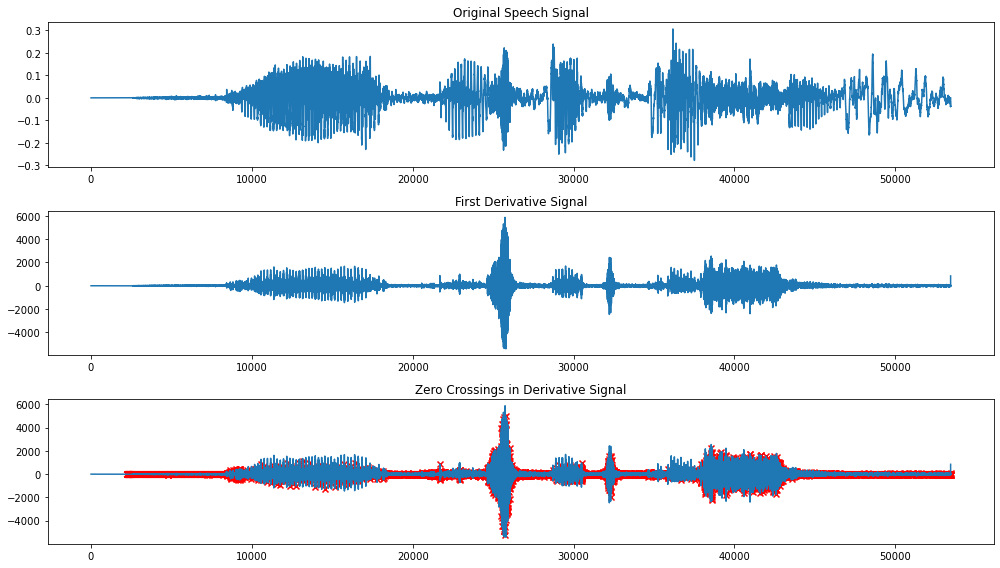

Average Length between Consecutive Zero Crossings: 3.5421678418360294


In [12]:
def firstderivative2(signal, fs):
  derivative = np.diff(signal) * fs
  return derivative
def zero_crossings2(signal):
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    return zero_crossings
audio_data2, fs2 = librosa.load(filename)
derivative_signal2 = firstderivative2(audio_data2, fs2)
zero_crossings_indices2 = zero_crossings2(derivative_signal2)
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(audio_data2)
plt.title('Original Speech Signal')


plt.subplot(3, 1, 2)
plt.plot(derivative_signal2)
plt.title('First Derivative Signal')

plt.subplot(3, 1, 3)
plt.plot(derivative_signal2)
plt.scatter(zero_crossings_indices2, derivative_signal2[zero_crossings_indices2], c='r', marker='x', label='Zero Crossing')
plt.title('Zero Crossings in Derivative Signal')

plt.tight_layout()
plt.show()
average_length = np.mean(np.diff(zero_crossings_indices2))
print("Average Length between Consecutive Zero Crossings:", average_length)

## A3. Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

In [13]:
import numpy as np
import scipy.io.wavfile as wav
import librosa

def split_speech_into_words(signal, threshold):
    crossings = np.where(np.abs(signal) > threshold)[0]
    words = np.split(signal, crossings)
    words = [word for word in words if len(word) > 1000]  # Adjust threshold as needed
    return words

fs_you, speech_you = wav.read('Lokesh.wav')

fs_teammate, speech_teammate = wav.read('Akhil.wav')

threshold = 1000  

words_you = split_speech_into_words(speech_you, threshold)
words_teammate = split_speech_into_words(speech_teammate, threshold)

durations_you = [len(word) / fs_you for word in words_you]
durations_teammate = [len(word) / fs_teammate for word in words_teammate]

print("Your spoken words durations (in seconds):", durations_you)
print("Team mate's spoken words durations (in seconds):", durations_teammate)

Your spoken words durations (in seconds): [0.48954166666666665, 0.1876875, 0.024416666666666666, 0.0244375, 0.06779166666666667, 0.46010416666666665, 0.10633333333333334, 0.15985416666666666, 0.6100833333333333, 1.4899583333333333, 0.20916666666666667]
Team mate's spoken words durations (in seconds): [1.56475, 0.07333333333333333, 0.06641666666666667, 0.14854166666666666, 0.065625, 0.2445625, 0.0775625, 0.17841666666666667, 0.024875, 0.17983333333333335, 0.238125, 0.06483333333333334, 0.10045833333333333, 0.06941666666666667, 0.02675, 0.025125, 0.0951875, 0.02660416666666667, 0.42275]


## A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

In [15]:
import numpy as np
import scipy.signal as signal
import librosa

import matplotlib.pyplot as plt
from IPython.display import Audio

speech_signal1, sample_rate1 = librosa.load('Q4a.wav')
speech_signal2, sample_rate2 = librosa.load('Q4b.wav')

In [16]:
print("Question Signal:")
Audio(speech_signal1, rate=sample_rate1)

Question Signal:


In [17]:
print("statement Signal:")
Audio(speech_signal2, rate=sample_rate2)

statement Signal:


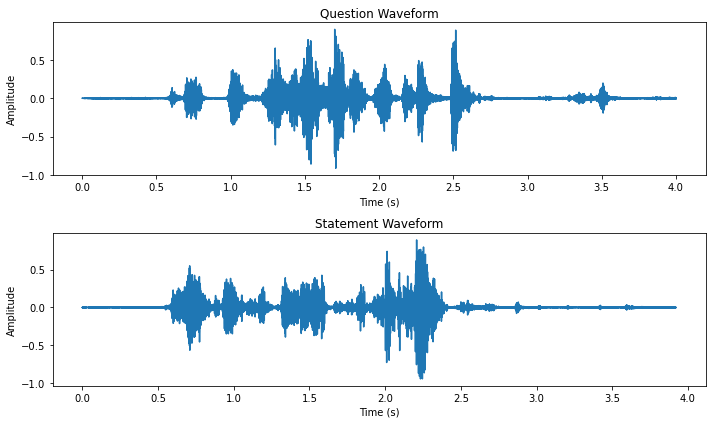

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal1)) / sample_rate1,speech_signal1 )
plt.title('Question Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(speech_signal2)) /sample_rate2 ,speech_signal2 )
plt.title('Statement Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

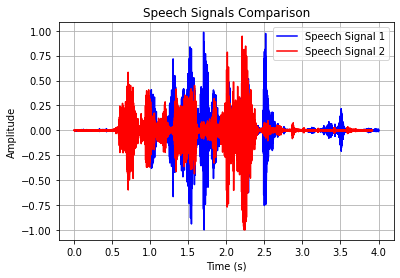

In [19]:
speech_signal1 = speech_signal1.astype(np.float32) / np.max(np.abs(speech_signal1))
speech_signal2 = speech_signal2.astype(np.float32) / np.max(np.abs(speech_signal2))

time1 = np.linspace(0, len(speech_signal1) / sample_rate1, len(speech_signal1))
time2 = np.linspace(0, len(speech_signal2) / sample_rate2, len(speech_signal2))

plt.plot(time1, speech_signal1, color='blue', label='Speech Signal 1')
plt.plot(time2, speech_signal2, color='red', label='Speech Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Signals Comparison')
plt.legend()
plt.grid(True)
plt.show()